In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = "C:\\Users\\TRINAVA\\Desktop\\Self\\Statistic project\\datasets framingham.csv"
df= pd.read_csv(file_path)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [5]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (4240, 16)

First 5 rows:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   Te

In [6]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 K

In [7]:
print("\nSummary Statistics:")
print(df.describe().T)


Summary Statistics:
                  count        mean        std     min     25%    50%     75%  \
male             4240.0    0.429245   0.495027    0.00    0.00    0.0    1.00   
age              4240.0   49.580189   8.572942   32.00   42.00   49.0   56.00   
education        4135.0    1.979444   1.019791    1.00    1.00    2.0    3.00   
currentSmoker    4240.0    0.494104   0.500024    0.00    0.00    0.0    1.00   
cigsPerDay       4211.0    9.005937  11.922462    0.00    0.00    0.0   20.00   
BPMeds           4187.0    0.029615   0.169544    0.00    0.00    0.0    0.00   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.00    0.0    0.00   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.00    0.0    1.00   
diabetes         4240.0    0.025708   0.158280    0.00    0.00    0.0    0.00   
totChol          4190.0  236.699523  44.591284  107.00  206.00  234.0  263.00   
sysBP            4240.0  132.354599  22.033300   83.50  117.00  128.0  144.00   
diaBP  

In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [9]:
df = df.dropna()

print("Shape after removing missing values:", df.shape)

Shape after removing missing values: (3658, 16)


In [10]:
df = df[["age", "male", "currentSmoker", "cigsPerDay", "totChol", "BMI", "TenYearCHD"]]

C:\Users\TRINAVA\AppData\Local\Temp\ipykernel_3324\3770897040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TenYearCHD", data=df, palette="Set2")


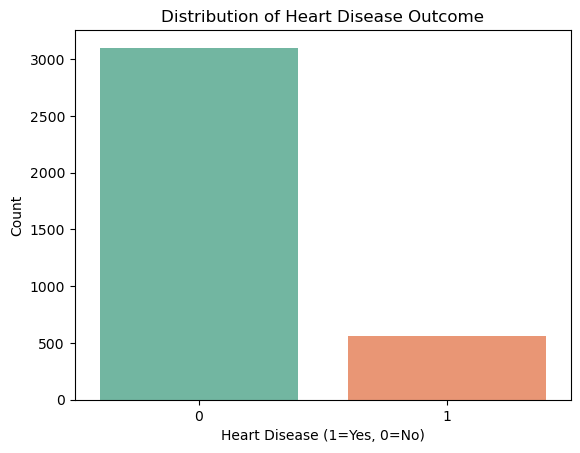

In [11]:
sns.countplot(x="TenYearCHD", data=df, palette="Set2")
plt.title("Distribution of Heart Disease Outcome")
plt.xlabel("Heart Disease (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

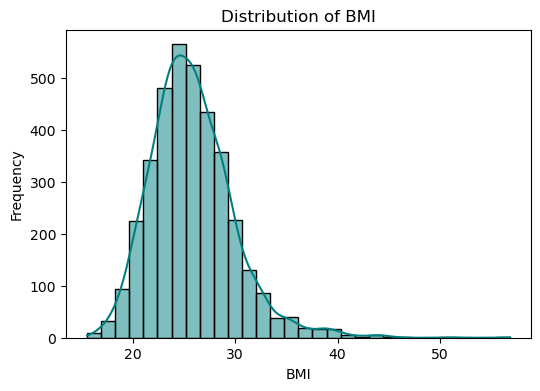

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["BMI"].dropna(), kde=True, bins=30, color="teal")
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

C:\Users\TRINAVA\AppData\Local\Temp\ipykernel_3324\845795268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TenYearCHD", y="BMI", data=df, palette="Set2")


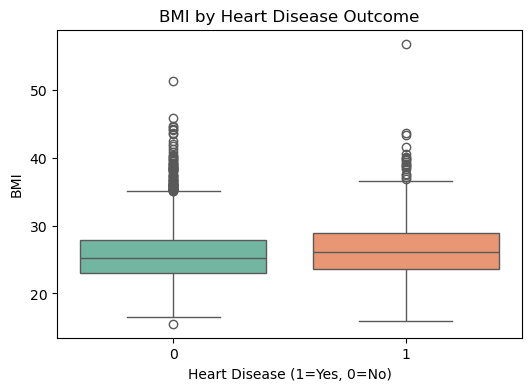

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="TenYearCHD", y="BMI", data=df, palette="Set2")
plt.title("BMI by Heart Disease Outcome")
plt.xlabel("Heart Disease (1=Yes, 0=No)")
plt.ylabel("BMI")
plt.show()

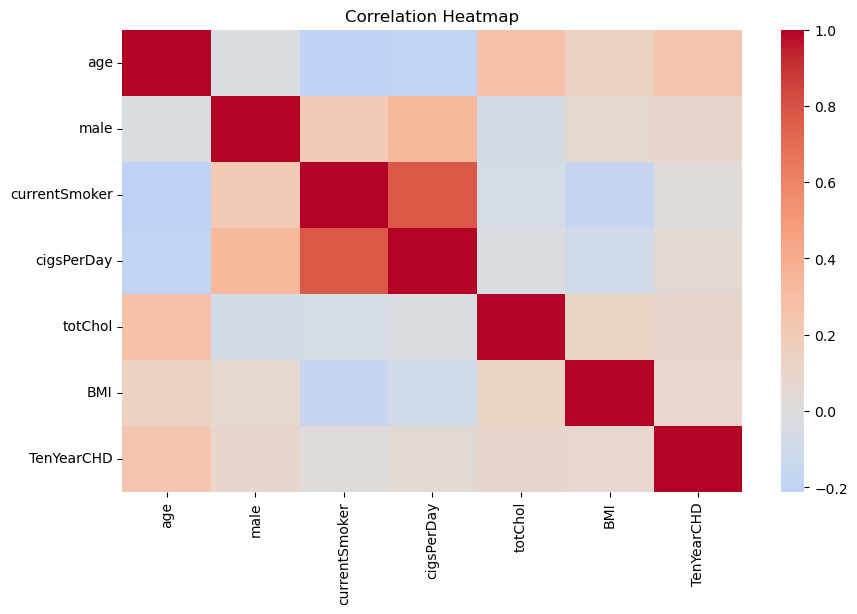

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
X_uni = df[["BMI"]]
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=42)


In [16]:
log_reg_uni = LogisticRegression(max_iter=1000)
log_reg_uni.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
y_pred_uni = log_reg_uni.predict(X_test)
y_prob_uni = log_reg_uni.predict_proba(X_test)[:,1]

In [18]:
print("🔹 Univariate Logistic Regression (BMI only)")
print("Accuracy:", accuracy_score(y_test, y_pred_uni))
print("\nClassification Report:\n", classification_report(y_test, y_pred_uni))


🔹 Univariate Logistic Regression (BMI only)
Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       610
           1       0.00      0.00      0.00       122

    accuracy                           0.83       732
   macro avg       0.42      0.50      0.45       732
weighted avg       0.69      0.83      0.76       732



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


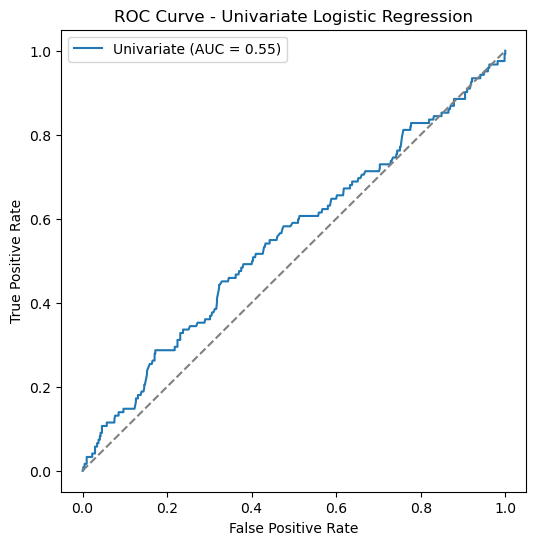

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob_uni)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Univariate (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Univariate Logistic Regression")
plt.legend()
plt.show()

In [21]:
import statsmodels.api as sm


In [22]:
X_uni_sm = sm.add_constant(X_uni)
model_uni = sm.Logit(y, X_uni_sm).fit()
print(model_uni.summary())


Optimization terminated successfully.
         Current function value: 0.423411
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3656
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Sep 2025   Pseudo R-squ.:                0.007534
Time:                        18:49:13   Log-Likelihood:                -1548.8
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 1.240e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0891      0.286    -10.820      0.000      -3.649      -2.529
BMI            0.0526      0.

In [23]:
params = model_uni.params
conf = model_uni.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
conf = np.exp(conf)
print("\nOdds Ratios with 95% CI (Univariate):\n", conf)




Odds Ratios with 95% CI (Univariate):
            2.5%     97.5%        OR
const  0.026026  0.079699  0.045544
BMI    1.032180  1.076295  1.054007


In [24]:
X_multi = df[["age", "male", "currentSmoker", "cigsPerDay", "totChol", "BMI"]]

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [25]:
log_reg_multi = LogisticRegression(max_iter=1000)
log_reg_multi.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
y_pred_multi = log_reg_multi.predict(X_test)
y_prob_multi = log_reg_multi.predict_proba(X_test)[:,1]


In [27]:
print("\n🔹 Multivariate Logistic Regression (BMI + Risk Factors)")
print("Accuracy:", accuracy_score(y_test, y_pred_multi))
print("\nClassification Report:\n", classification_report(y_test, y_pred_multi))


🔹 Multivariate Logistic Regression (BMI + Risk Factors)
Accuracy: 0.8346994535519126

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.67      0.02      0.03       122

    accuracy                           0.83       732
   macro avg       0.75      0.51      0.47       732
weighted avg       0.81      0.83      0.76       732



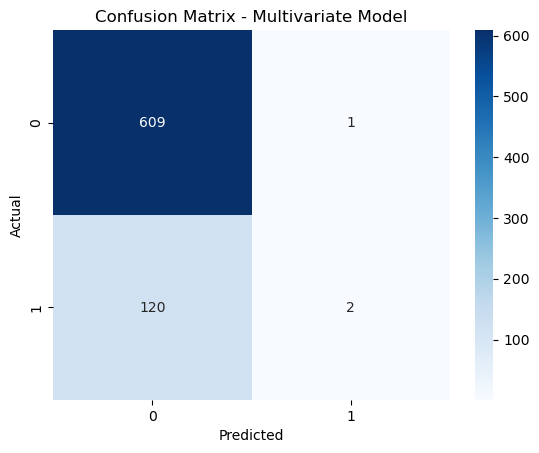

In [28]:
cm = confusion_matrix(y_test, y_pred_multi)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Multivariate Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

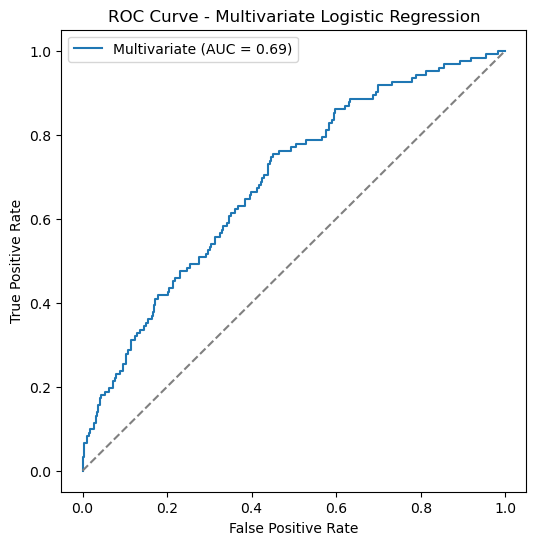

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_prob_multi)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Multivariate (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multivariate Logistic Regression")
plt.legend()
plt.show()

In [30]:
X_multi_sm = sm.add_constant(X_multi)
model_multi = sm.Logit(y, X_multi_sm).fit()
print(model_multi.summary())

Optimization terminated successfully.
         Current function value: 0.388718
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Sep 2025   Pseudo R-squ.:                 0.08885
Time:                        18:51:48   Log-Likelihood:                -1421.9
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 5.879e-57
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.1480      0.513    -15.893      0.000      -9.153      -7.143
age               0.

In [31]:
params = model_multi.params
conf = model_multi.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
conf = np.exp(conf)
print("\nOdds Ratios with 95% CI (Multivariate):\n", conf)


Odds Ratios with 95% CI (Multivariate):
                    2.5%     97.5%        OR
const          0.000106  0.000790  0.000289
age            1.072124  1.098137  1.085052
male           1.300464  1.957069  1.595336
currentSmoker  0.780834  1.428294  1.056059
cigsPerDay     1.005550  1.029989  1.017696
totChol        1.000996  1.005353  1.003172
BMI            1.016888  1.064432  1.040388
